In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measure = Base.classes.measurement
stations = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
# Sort table 'measure' by descending order, then pull first row to get most recent date
recentdate = session.query(measure).order_by(measure.id.desc()).first()
# Show full row
recentdate.__dict__
# Show just date
recentdate.date

'2017-08-23'

<Axes: title={'center': 'Precipitation'}, xlabel='Date', ylabel='Inches'>

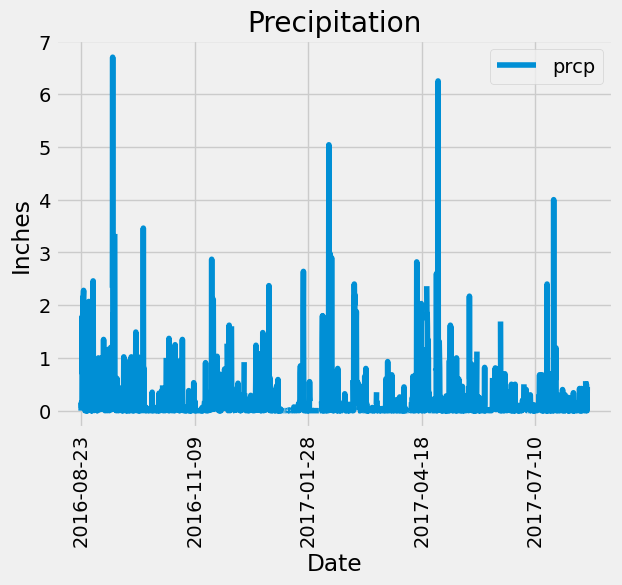

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
recentdate = session.query(measure).order_by(measure.id.desc()).first()
yeardates = session.query(measure.date).\
    filter(measure.date >= '2016-08-23').\
    order_by(measure.date).all()
#yeardates
# Perform a query to retrieve the data and precipitation scores
data1 = session.query(measure.station, measure.date, measure.prcp, measure.tobs).\
    filter(measure.date >= '2016-08-23').\
    order_by(measure.date).all()
data1
# Save the query results as a Pandas DataFrame. Explicitly set the column names
dates_df = pd.DataFrame(data1, columns= ['station', 'date', 'prcp', 'tobs'])
dates_df

# Sort the dataframe by date
sdatesdf = dates_df.sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the data
sdatesdf.plot(x='date', y='prcp', xlabel = 'Date', ylabel = 'Inches', title= 'Precipitation', rot=90)


In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
dsum = dates_df.prcp.describe()
dsum.to_frame()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number of stations in the dataset
stotal = session.query(stations).count()
stotal


9

In [14]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts 
scounts = session.query(measure.station, func.count(measure.station)).group_by(measure.station).all()
scounts
scountsdf = pd.DataFrame(scounts, columns=['station','count'])
scountsdf

,station,count
0,USC00511918,1979
1,USC00513117,2709
2,USC00514830,2202
3,USC00516128,2612
4,USC00517948,1372
5,USC00518838,511
6,USC00519281,2772
7,USC00519397,2724
8,USC00519523,2669


In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# Find station with max entries
scountsdf['count'].max()
# Filter for the station matching max count
astation = dates_df[(dates_df["station"] == 'USC00519281')]

# Manually calculate to check
amax = astation['tobs'].max()
amin = astation['tobs'].min()
aavg = astation['tobs'].mean()

# Sum. Stats. table gives desired info and more
asum = astation.tobs.describe()
asum.to_frame()

,tobs
count,352.000000
mean,73.107955
std,4.733315
min,59.000000
25%,70.000000
50%,74.000000
75%,77.000000
max,83.000000


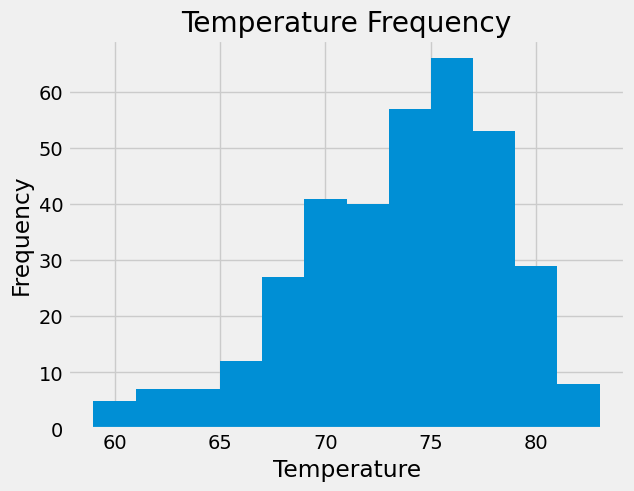

In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
adata = session.query(measure.station, measure.date, measure.tobs).\
    filter((measure.station == 'USC00519281'),(measure.date >= '2016-08-23')).\
    order_by(measure.date).all()
adata

#Create DataFrame to then plot a histogram with 12 bins
adatadf = pd.DataFrame(adata, columns=['station','date','tobs'])
adatadf
plt.hist(adatadf['tobs'], bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature Frequency')
plt.show()

# Close Session

In [17]:
# Close Session
session.close()